In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

The machine learning that seemed of interest for the project are genetic algorithms (GA) and artificial neural networks (ANN). So basic examples of GA and ANN were first copied and pasted and, after some study of the topic, they were understood, customized and documented.

## Genetic algorithm: getting a numerical password

The problem is getting a numerical string of variable length with numbers from 0 to 9. It will be assumed that the number of correct values for each attempt is known (although its  locations reamin unknown).

To solve the problem, genetic algorithms will be used. Genetic algorithms are a metaheuristic optimization method that (eventually) finds the global optimum. The code begins with an initial population, whose fitness is evaluated. The fitness is a measure of how 'well' does each individual performs inside the population. Once the fitness is evaluated, the individuals with higher fitness are selected, combined and mutated, obtaining a new population. This population undergoes the fitness evaluation again, closing the loop. The code is divided in the next functions:

* First population: initialization of a random population
* Fitness evaluation: evaluation of the fitness, in this case by comparing how many values of each individual coincide with the true code
* Selection: the individuals with higher fitness are selected
* Breeding: the selected individuals are mixed. Genetic algorithms are based on the idea that high fitness parents will create high fitness offspring
* Mutation: the individuals are mutated to add perturbations, in order to avoid stucking in a local minimum

#### Chart flow of a genetic algorithm

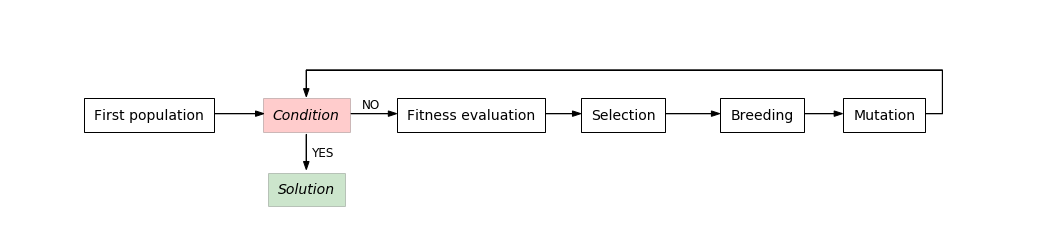

In [2]:
fig, ax = plt.subplots(1, figsize=(18,4))
ax.axis('off')
ax.set_ylim([-1,3])
ax.set_xlim([0,18])
ax.text(1, 1, 'First population', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(2.6,1.1,1.29,0.0,fc='k',head_width=0.1)
ax.text(4.2, 1, 'Condition', style='italic', fontsize = 14, bbox = {'facecolor':'red', 'alpha':0.2, 'pad':10})
ax.arrow(5.6,1.1,0.67,0.0,fc='k',head_width=0.1)
ax.text(5.8, 1.2, 'NO', fontsize = 12)
ax.text(6.6, 1, 'Fitness evaluation', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(9.0,1.1,0.57,0.0,fc='k',head_width=0.1)
ax.text(9.9, 1, 'Selection', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(11.1,1.1,0.96,0.0,fc='k',head_width=0.1)
ax.text(12.4, 1, 'Breeding', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(13.1,1.1,1.16,0.0,fc='k',head_width=0.1)
ax.text(14.6, 1, 'Mutation', fontsize = 14, bbox = {'facecolor':'white', 'pad':10})
ax.arrow(15.7,1.1,0.5,0.0)
ax.arrow(16.2,1.1,0.0,0.8)
ax.arrow(16.2,1.9,-11.4,0.0)
ax.arrow(4.8,1.9,0.0,-0.34,fc='k',head_width=0.1)
ax.arrow(4.8,0.72,0.0,-0.5,fc='k',head_width=0.1)
ax.text(4.3, -0.37, 'Solution', style='italic', fontsize = 14, bbox = {'facecolor':'green', 'alpha':0.2, 'pad':10})
ax.text(4.9, 0.32, 'YES', fontsize = 12);

### First population

In [3]:
def first_gen(N, Nind): 
    # generate the first generation from random numbers
    
    # define a list for all the generation
    gen0 = []
    
    # append Nind of length N to the population
    for i in range(Nind):
        gen0.append(np.random.randint(0, 10, N))

    # return the list with the individuals
    return gen0

### Fitness evaluation

In [4]:
def fitness(trueCode, generation): 
    # compare digit by digit and get the number of the ones that are correct
    
    # fitness list
    fit = []
    
    # loop over the whole generation
    for i in range(len(generation)):
        # substract the values, the ones that are not zero (False) will be the differents
        fitness = np.sum((trueCode- generation[i]) != 0)
        # return the values that are correct 
        fit.append(len(trueCode) - fitness)

    return fit

### Selection

In [5]:
def selection(generation, fitness): 
    # select the individuals with fitness values above the mean

    # create an empty list for the intermediate population
    intPop = []
    
    # fill the list with the individuals that have fitness values above the mean
    for i in range(len(fitness)):
        if fitness[i] > np.mean(np.array(fitness)):
            intPop.append(generation[i])
    
    # return the intermediate population
    return intPop

### Breeding

In [6]:
def breeding(newPopSize, intermediatePopulation): 
    # breed the intermediate population

    # create a list for the new population
    newPop = []
    
    # loop over the size of the new population size
    for i in range(newPopSize):
        # pick two random parents from intermediatePopulation
        ind0 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        ind1 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        while ind0 == ind1:
            ind1 = int(np.random.choice(np.linspace(0,len(intermediatePopulation)-1,len(intermediatePopulation))))
        # select the crossover point randomly
        crssPt = np.random.randint(0,len(intermediatePopulation[0]))
        # take [:crssPt] from first individual and [crssPt:] from the second to get the new individual        
        newPop.append(np.concatenate((intermediatePopulation[ind0][:crssPt],intermediatePopulation[ind1][crssPt:])))
    
    return newPop

### Mutation

In [7]:
def mutation(newGeneration, currentGenIter, totalGenIter): 
    # mutate the new generation with a descending probability as generation evolves
    
    # for the first half of the algorithm, mutation probability will be
    if currentGenIter < totalGenIter/2 :
        p = 0.5*(totalGenIter - currentGenIter)/(totalGenIter)
    # for the second half of the iterations, probability will be fixed
    else:
        p = 0.2
    
    # create a list for the mutated generation
    mutatedGen = []
    
    # loop over the population
    for i in range(len(newGeneration)):
        # if the probability is below the limit
        if np.random.rand() < p:
            # create an empty deviation array
            deviation = np.zeros(len(newGeneration[0]))
            # add a random +1 or -1 in a random location
            deviation[np.random.randint(0,len(newGeneration[0])-1)] = np.random.choice([1,-1])
            # add this deviation to the individial
            mutatedGen.append(newGeneration[i] + (deviation).astype(int))
                           
        # otherwise keep the individual as it was
        else:
            # add the non-mutated individual
            mutatedGen.append(newGeneration[i])

        # corret numbers above 9 and below 0 to the range [0,9]
        if np.any(np.zeros(len(mutatedGen[i])) > mutatedGen[i]) or np.any(9*np.ones(len(mutatedGen[i])) < mutatedGen[i]):
            # with a random number in the interval
            mutatedGen[i][np.zeros(len(mutatedGen[i])) > mutatedGen[i]] = np.random.randint(0,10)
            mutatedGen[i][9*np.ones(len(mutatedGen[i])) < mutatedGen[i]] = np.random.randint(0,10)
            
    return mutatedGen

### Looping in the algorithm

In [8]:
# true code to find
code = [5,4,1,2,1,3,5,9,8,1,5]

# find parameters of the algorithm
Nind = 50
Ngen = 100

In [9]:
# create a list to store the generation lists with the arrays inside
gen = []

# create the list to store the fitness value
fitList = []

# store the first generation in the generations list
gen.append(first_gen(len(code), Nind))

In [10]:
# loop over all generations
for i in range(Ngen):
    # fitness calculation
    fitList.append(fitness(code, gen[i]))
    # intermediate generation
    selectedGen = selection(gen[i], fitList[i])
    # breeding of the population
    bredGen = breeding(Nind, selectedGen)
    # mutation of the generation
    mutGen = mutation(bredGen, i, Ngen)
    # storage of the new generation
    gen.append(mutGen)

[None, None]

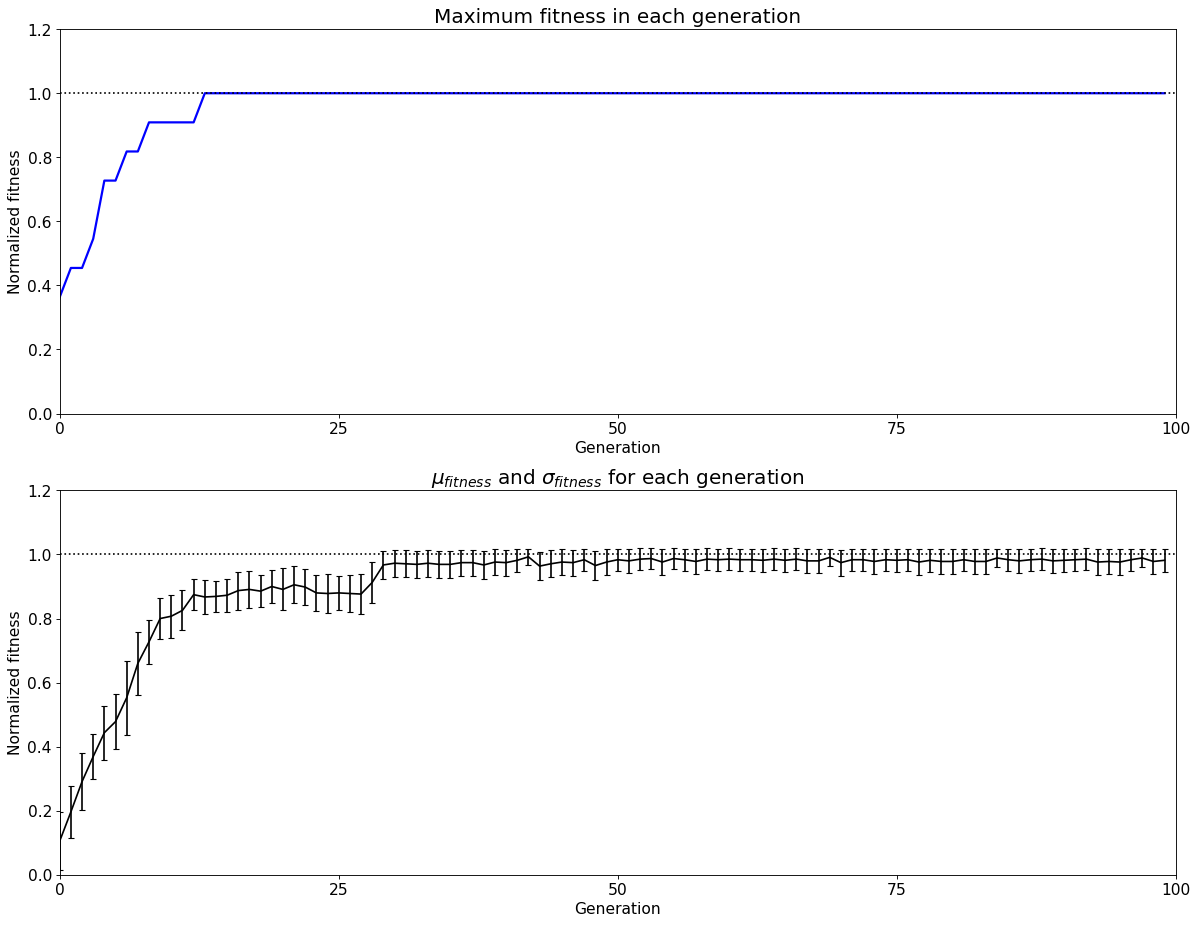

In [11]:
# compute the maximum fitness of each generation
yMax = np.array([np.max(fitList[i]) for i in range(Ngen)])/len(code)
# compute the mean of fitness of each generation
yMean = np.array([np.mean(fitList[i]) for i in range(Ngen)])/len(code)
# compute the standard deviation of fitness of each generation
yStd = np.array([np.std(fitList[i]) for i in range(Ngen)])/len(code)

# plot the results
fig, ax = plt.subplots(2,figsize=(18,14), dpi = 80)
ax[0].plot(np.linspace(0,Ngen-1,Ngen), yMax, 'b-', lw=2)
ax[1].errorbar(np.linspace(0,Ngen-1,Ngen),yMean,yStd,capsize=3, color='k')
[ax[i].plot([0,Ngen],[1.0,1.0],'k:') for i in range(2)]
[ax[i].set_ylim([0,1.2]) for i in range(2)]
[ax[i].set_xlim([0,Ngen]) for i in range(2)]
[ax[i].set_ylabel('Normalized fitness',fontsize = 14) for i in range(2)]
[ax[i].set_xlabel('Generation',fontsize = 14) for i in range(2)]
[ax[i].set_xticks(np.arange(0,Ngen+25,25)) for i in range(2)]
ax[0].set_title('Maximum fitness in each generation', fontsize=18)
ax[1].set_title(r'$\mu_{fitness}$ and $\sigma_{fitness}$ for each generation', fontsize=18)
[ax[i].tick_params(axis='both', which='major', labelsize=14) for i in range(2)]

It can be seen that convergence is achieved, having that the individuals in the last generation are very close to the true code. Take into account that running this code again the output may vary, due to the stochasticity of the method. However, to better see how does the algorithm converges

Text(0.5,1.05,'Last generation')

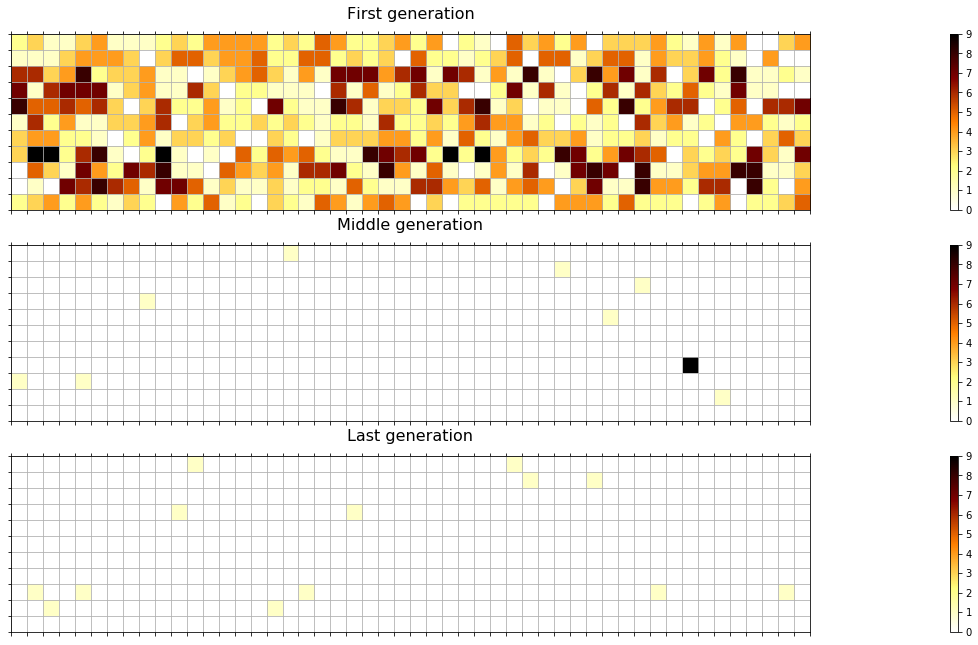

In [12]:
# this plot show discrepancies between arrays, let's show up the difference between first/last generation and true code
fig, ax = plt.subplots(3, figsize=(Nind,len(code)))
im0 = ax[0].matshow(np.vstack([abs(gen[0][i] - code) for i in range(len(gen[0]))]).T, cmap=plt.cm.get_cmap('afmhot_r'), vmin = 0, vmax = 9)
im1 = ax[1].matshow(np.vstack([abs(gen[int(len(gen)/2)][i] - code) for i in range(len(gen[int(len(gen)/2)]))]).T, cmap=plt.cm.get_cmap('afmhot_r'), vmin = 0, vmax = 9)
im2 = ax[2].matshow(np.vstack([abs(gen[-1][i] - code) for i in range(len(gen[-1]))]).T, cmap=plt.cm.get_cmap('afmhot_r'), vmin = 0, vmax = 9)
plt.colorbar(im0, ax=ax[0])
plt.colorbar(im1, ax=ax[1])
plt.colorbar(im2, ax=ax[2])
[ax[i].set_xticks(np.arange(0,Nind+1,1)-0.5) for i in range(3)]
[ax[i].set_yticks(np.arange(0,len(code)+1,1)-0.5) for i in range(3)]
[ax[i].grid() for i in range(3)]
[ax[i].tick_params(labelleft=False,labeltop=False) for i in range(3)]
ax[0].set_title('First generation', fontsize = 16)
ax[1].set_title('Middle generation', fontsize = 16)
ax[2].set_title('Last generation', fontsize = 16)

## Artificial neural networks: computing square roots
The next example is a very simple artificial neural network, trained with backpropigation to compute square roots in certain range (the range in which the training set is defined).

* **Step 1: initialization of weights and bias with small random values.** Both the weights and the bias are randomly initialized with small values to avoid too large outputs after the network evaluation.


* **Step 2: select a training set example.** Select an input set $x_p$ with a desired output $d_p$. Although this example consists only in one input and one outuput neurons, these two layers may be formed by more than one, having $X_p=(x_{p1},x_{p2},x_{p3},...,x_{pN})$ and $D_p=(d_{p1},d_{p2},d_{p3},...,d_{pn})$. Subscript $p$ refers to certain training dataset. 


* **Step 3: forward propigation of the neural network.**  Compute the value of each neuron $n_{i,j}$ for all the neurons $j\in [0,n-1]$ in every layer $i\in [0,L-1]$. To do that, the process is subdivided in three  parts:
    * Propigation from the first layer to the first hidden layer: the input is multiplied by the weights and added the bias, having:
    $$ n_{0,j} = w[0]_{j} \cdot x_p + b_{0,j}$$
    * Propigation within the hidden layers: inside the hidden layers, each neuron state is a sum of the state from each neuron in the previous layer multiplied by the corresponding weights added to the bias. The transition from the hidden layer $0$ to the hidden layer $1$ in the sketch is derived:
    $$ n_{i,j} = \sum_{k=0}^{n-1}w[i]_{k,j} \cdot n_{i-1,k} + b_{i,j} \longrightarrow $$ $$\longrightarrow \begin{bmatrix} n_{1,0} && = && (w[1]_{0,0}\cdot n_{0,0} && + && w[1]_{1,0}\cdot n_{0,1} && ... && + && w[1]_{n-1,0}\cdot n_{0,n-1})&&+&&b_{1,0}\\
    n_{1,1} && = && (w[1]_{0,1}\cdot n_{0,0} && + && w[1]_{1,1}\cdot n_{0,1} && ... && + && w[1]_{n-1,1}\cdot n_{0,n-1})&&+&&b_{1,1}\\
    ... \\
    n_{1,n-1} && = && (w[1]_{0,n-1}\cdot n_{0,0} && + && w[1]_{1,n-1}\cdot n_{0,1} && ... && + && w[1]_{n-1,n-1}\cdot n_{0,n-1})&&+&&b_{1,n-1} \end{bmatrix}$$
    * Propigation from the last hidden layer to the output layer: finally, the last hidden layer is fully connected to the only output, having that the output value of the neural network is:
    $$ y_p = \sum_{k=0}^{n-1}w[L]_{k} \cdot n_{L-1,k} $$
    
    
* **Step 4: compute the error $(\delta)$ for every neuron.** Once each neuron has an assigned value, the error of the output is computed by comparing the obtained output $y_p$ with the desired one $d_p$. The formal definition of the error of the ouput neuron is: 
$$ \delta_p^0 = (d_p-y_p) \cdot f^{0^\prime} (n^0_p)$$
However, given that the function chosen $f(n)$ is a linear function $f(n)=n$ instead of the typical sigmoid function, so commonly used for ANN and defined as $f(n)=\dfrac{1}{1+e^{-n}}$, the derivative of $f(n)$ is 1. Forward propigation should **be modified** if the function is not lineal. In this case, sigmoid function is not useful because it only outputs binary data $\in (0,1)$, but here real numbers are desired. Therefore, the error for the output neuron with linear function is
$$ \delta_p^o = (d_p-y_p) $$
for a neuron in the transition from output to hidden layer is
$$ \delta^h_{L-1,j} = w[L]_j \cdot \delta^o $$
and for a neuron inside the hidden layers is:
$$ \delta^h_{i,j} = \sum_{k=0}^{n-1} W[i+1]_{j,k}\cdot \delta^h_{i+1,k}$$
(given that the correct value of the hidden neurons is unknown).


* **Step 5: backwards propigation of the error to update weights and bias.** Once the errors of each neuron (except the ones at the input layer) have been computed, the weights and bias values will be updated. A learning rate $\alpha$ is used to control how fast does the network learns. Begining with the bias of each neuron, it is updated by:
$$ b^{new}_{i,j} = b^{old}_{i,j} + \alpha \cdot \delta^h_{i,j}$$
Weights are updated again in three different phases depending on whether the weights belong to the:
 * Transition between input and hidden layers:
 $$ w[L]^{new} = w[L]^{old} + \alpha \cdot \delta^0 \cdot n_{L-1} $$
 * Transition within hidden layers:
 $$ w[i]^{new} = w[i]^{old} + \alpha \cdot \delta^h_{i} \cdot n_{i-1} $$
 * Transition between hidden and output layers:
 $$ w[0]^{new} = w[0]^{old} + \alpha \cdot \delta^h_{0} \cdot x_p $$


* **Step 6: error computation and wrapping up.** The error of the neural network is computed with:
$$ E_p = \dfrac{1}{2} \sum_{k=0}^{M-1} \delta_{p,k}^{o^2}$$
but given that in this case the number of neurons in the output layer is just $M=1$, the error is reduced to:
$$ E_p = \dfrac{1}{2} (\delta^{o})^{2}$$
The closer $E_p$ to zero, the better, given that the error in the output of the network will be close to zero. The way the weights and bias are updated are by repeating steps from 3 to 5 until the value of $E_p$ is small enough. Overfeeding is a problem that must be avoided, because then the ANN will work only in just one case. 

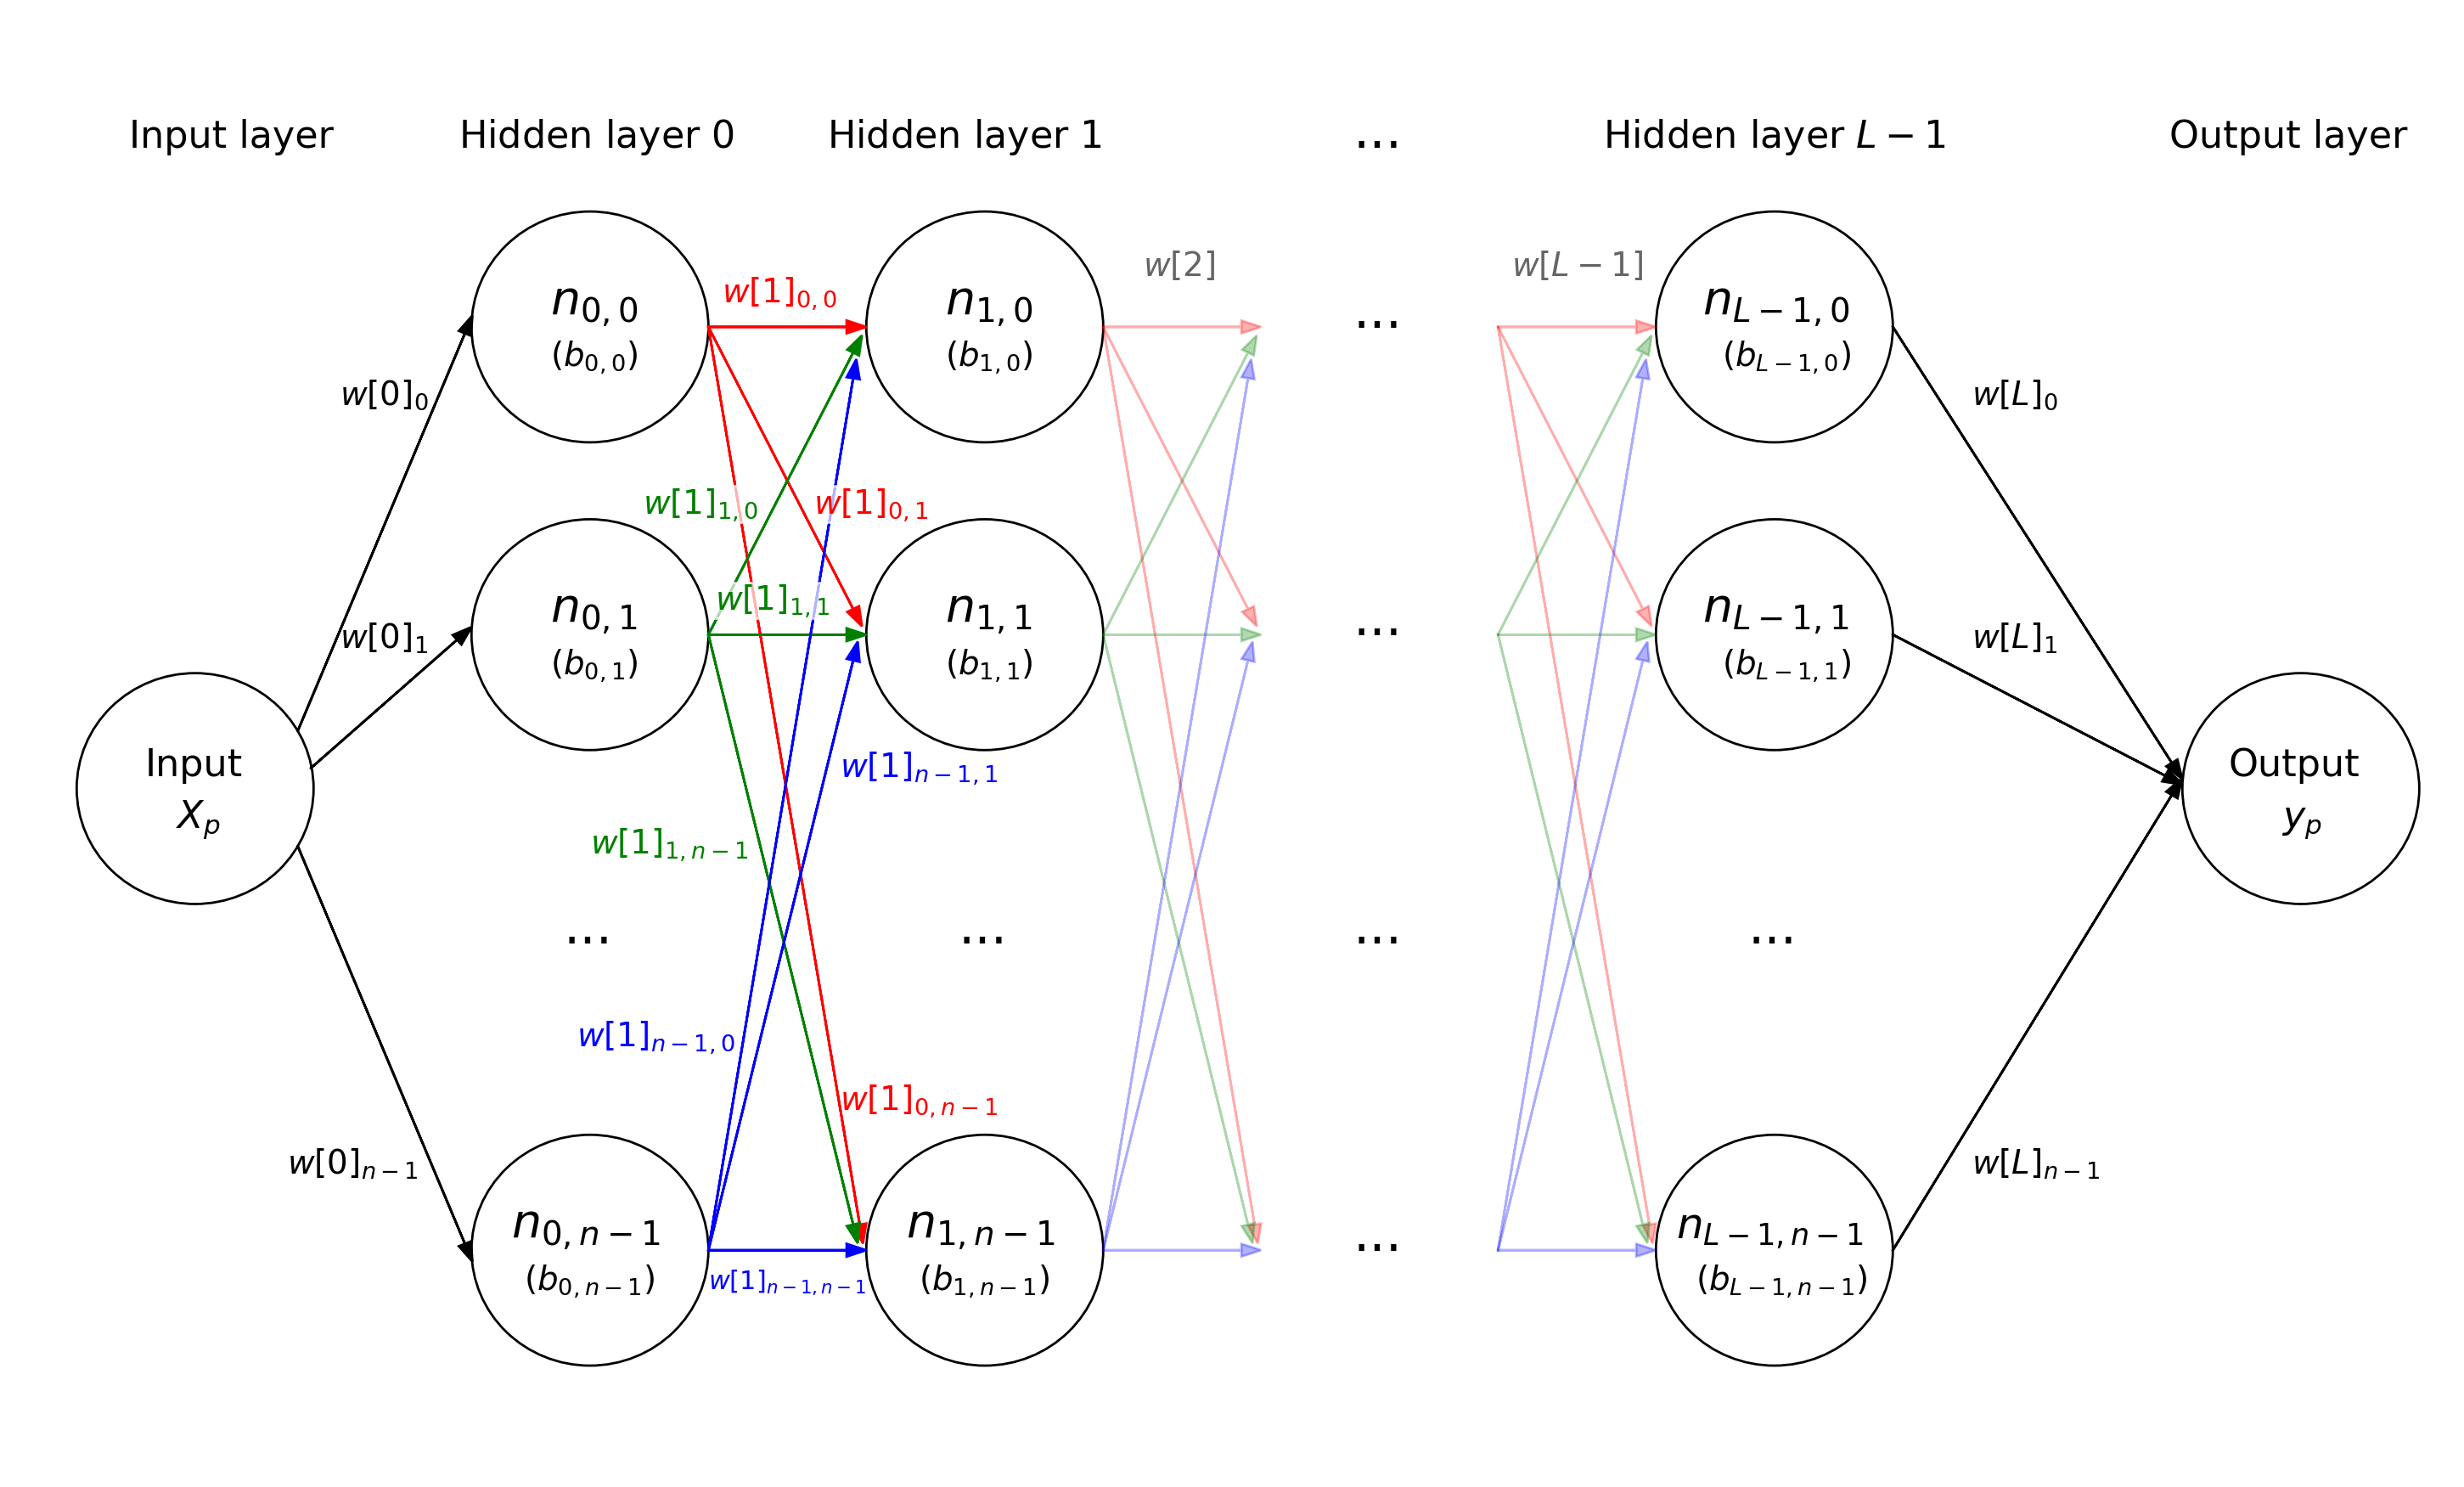

In [13]:
fig, ax = plt.subplots(1, figsize=(18,11), dpi=200)

ax.axis('off')
ax.set_xlim([0,18])
ax.set_ylim([0,11])

ni = []
ni.append(patches.Circle((1, 5), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((4, 8.6), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((4, 6.2), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((4, 1.4), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((7, 8.6), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((7, 6.2), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((7, 1.4), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((13, 8.6), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((13, 6.2), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((13, 1.4), 0.9, ec='k',fc='white'))
ni.append(patches.Circle((17, 5), 0.9, ec='k',fc='white'))
[ax.add_patch(ni[i]) for i in range(len(ni))];

ax.text(0.5, 10, r'Input layer', fontsize = 16)
ax.text(3, 10, r'Hidden layer $0$', fontsize = 16)
ax.text(5.8, 10, r'Hidden layer $1$', fontsize = 16)
ax.text(3.8, 3.8, '...', fontsize = 22)
ax.text(6.8, 3.8, '...', fontsize = 22)
ax.text(9.8, 10.0, '...', fontsize = 22)
ax.text(9.8, 8.6, '...', fontsize = 22)
ax.text(9.8, 6.2, '...', fontsize = 22)
ax.text(9.8, 3.8, '...', fontsize = 22)
ax.text(9.8, 1.4, '...', fontsize = 22)
ax.text(12.8, 3.8, '...', fontsize = 22)
ax.text(11.7, 10, r'Hidden layer $L-1$', fontsize = 16)
ax.text(16, 10, r'Output layer', fontsize = 16)
ax.text(0.62,5.1,r'Input', fontsize = 16)
ax.text(16.45,5.1,r'Output', fontsize = 16)
ax.text(0.85,4.7,r'$X_p$', fontsize = 16)
ax.text(16.85,4.7,r'$y_p$', fontsize = 16)
ax.text(3.7,8.3,r'$(b_{0,0})$', fontsize = 14)
ax.text(3.7,5.9,r'$(b_{0,1})$', fontsize = 14)
ax.text(3.5,1.1,r'$(b_{0,n-1})$', fontsize = 14)
ax.text(6.7,8.3,r'$(b_{1,0})$', fontsize = 14)
ax.text(6.7,5.9,r'$(b_{1,1})$', fontsize = 14)
ax.text(6.5,1.1,r'$(b_{1,n-1})$', fontsize = 14)
ax.text(12.6,8.3,r'$(b_{L-1,0})$', fontsize = 14)
ax.text(12.6,5.9,r'$(b_{L-1,1})$', fontsize = 14)
ax.text(12.4,1.1,r'$(b_{L-1,n-1})$', fontsize = 14)
ax.text(3.7,8.7,r'$n_{0,0}$', fontsize = 20)
ax.text(3.7,6.3,r'$n_{0,1}$', fontsize = 20)
ax.text(3.4,1.5,r'$n_{0,n-1}$', fontsize = 20)
ax.text(6.7,8.7,r'$n_{1,0}$', fontsize = 20)
ax.text(6.7,6.3,r'$n_{1,1}$', fontsize = 20)
ax.text(6.4,1.5,r'$n_{1,n-1}$', fontsize = 20)
ax.text(12.45,8.7,r'$n_{L-1,0}$', fontsize = 20)
ax.text(12.45,6.3,r'$n_{L-1,1}$', fontsize = 20)
ax.text(12.25,1.5,r'$n_{L-1,n-1}$', fontsize = 18)

ax.text(2.1,8.0,r'$w[0]_{0}$', fontsize = 14)
ax.text(2.1,6.1,r'$w[0]_{1}$', fontsize = 14)
ax.text(1.7,2.0,r'$w[0]_{n-1}$', fontsize = 14)

ax.text(5.0,8.8,r'$w[1]_{0,0}$', color='r', fontsize = 14)
ax.text(5.7,7.15,r'$w[1]_{0,1}$', color='r', fontsize = 14, bbox = {'facecolor':'white', 'edgecolor':'white', 'alpha':0.7, 'pad':0})
ax.text(5.9,2.5,r'$w[1]_{0,n-1}$', color='r', fontsize = 14)

ax.text(4.4,7.15,r'$w[1]_{1,0}$', color='g', fontsize = 14, bbox = {'facecolor':'white', 'edgecolor':'white', 'alpha':0.7, 'pad':0})
ax.text(4.95,6.4,r'$w[1]_{1,1}$', color='g', fontsize = 14, bbox = {'facecolor':'white', 'edgecolor':'white', 'alpha':0.7, 'pad':0})
ax.text(4.0,4.5,r'$w[1]_{1,n-1}$', color='g', fontsize = 14)

ax.text(3.9,3.0,r'$w[1]_{n-1,0}$', color='b', fontsize = 14)
ax.text(5.9,5.10,r'$w[1]_{n-1,1}$', color='b', fontsize = 14)
ax.text(4.9,1.1,r'$w[1]_{n-1,n-1}$', color='b', fontsize = 11)

ax.text(14.5,8.0,r'$w[L]_{0}$', fontsize = 14)
ax.text(14.5,6.1,r'$w[L]_{1}$', fontsize = 14)
ax.text(14.5,2.0,r'$w[L]_{n-1}$', fontsize = 14)

ax.text(8.2,9.0,r'$w[2]$', alpha=0.6, fontsize = 14)
ax.text(11.0,9.0,r'$w[L-1]$', alpha=0.6, fontsize = 14)

ax.arrow(1.78,5.45,1.27,3.10, color='k', head_width=0.1)
ax.arrow(1.88,5.16,1.11,1.00, color='k', head_width=0.1)
ax.arrow(1.78,4.55,1.27,-3.1, color='k', head_width=0.1)

ax.arrow(4.9,8.6,1.05,0.0, color='r', head_width=0.1)
ax.arrow(4.9,8.6,1.1,-2.2, color='r', head_width=0.1)
ax.arrow(4.9,8.6,1.15,-7.0, color='r', head_width=0.1)
ax.arrow(4.9,6.2,1.1,2.2, color='g', head_width=0.1)
ax.arrow(4.9,6.2,1.05,0.0, color='g', head_width=0.1)
ax.arrow(4.9,6.2,1.1,-4.6, color='g', head_width=0.1)
ax.arrow(4.9,1.4,1.1,6.8, color='b', head_width=0.1)
ax.arrow(4.9,1.4,1.1,4.6, color='b', head_width=0.1)
ax.arrow(4.9,1.4,1.05,0.0, color='b', head_width=0.1)

ax.arrow(7.9,8.6,1.05,0.0, color='r', head_width=0.1, alpha=0.3)
ax.arrow(7.9,8.6,1.1,-2.2, color='r', head_width=0.1, alpha=0.3)
ax.arrow(7.9,8.6,1.15,-7.0, color='r', head_width=0.1, alpha=0.3)
ax.arrow(7.9,6.2,1.1,2.2, color='g', head_width=0.1, alpha=0.3)
ax.arrow(7.9,6.2,1.05,0.0, color='g', head_width=0.1, alpha=0.3)
ax.arrow(7.9,6.2,1.1,-4.6, color='g', head_width=0.1, alpha=0.3)
ax.arrow(7.9,1.4,1.1,6.8, color='b', head_width=0.1, alpha=0.3)
ax.arrow(7.9,1.4,1.1,4.6, color='b', head_width=0.1, alpha=0.3)
ax.arrow(7.9,1.4,1.05,0.0, color='b', head_width=0.1, alpha=0.3)

ax.arrow(10.9,8.6,1.05,0.0, color='r', head_width=0.1, alpha=0.3)
ax.arrow(10.9,8.6,1.1,-2.2, color='r', head_width=0.1, alpha=0.3)
ax.arrow(10.9,8.6,1.15,-7.0, color='r', head_width=0.1, alpha=0.3)
ax.arrow(10.9,6.2,1.1,2.2, color='g', head_width=0.1, alpha=0.3)
ax.arrow(10.9,6.2,1.05,0.0, color='g', head_width=0.1, alpha=0.3)
ax.arrow(10.9,6.2,1.1,-4.6, color='g', head_width=0.1, alpha=0.3)
ax.arrow(10.9,1.4,1.1,6.8, color='b', head_width=0.1, alpha=0.3)
ax.arrow(10.9,1.4,1.1,4.6, color='b', head_width=0.1, alpha=0.3)
ax.arrow(10.9,1.4,1.05,0.0, color='b', head_width=0.1, alpha=0.3)

ax.arrow(13.9,8.6,2.12,-3.4, color='k', head_width=0.1)
ax.arrow(13.9,6.2,2.07,-1.1, color='k', head_width=0.1)
ax.arrow(13.9,1.4,2.12,3.55, color='k', head_width=0.1)

In [14]:
# neurons per layer
n = 3

# layer of the network
L = 3

# learning rate
alpha = 0.001

In [15]:
def neuralNetwork(_input, weights, bias):
    # preallocate neuron space
    neuron = np.zeros(bias.shape)

    # input layer -> hidden layer
    neuron[:,0] = weights[0] * _input + bias[:,0]

    # hidden layers
    for i in range(1,L):
        neuron[:,i] = np.sum(weights[i].T * neuron[:,i-1], axis = 1) + bias[:,i]

    # hidden layers -> output layer
    _output = np.sum(weights[-1] * neuron[:,-1])
    
    return _output, neuron

In [16]:
def backpropigation(_input, _desiredOutput, _output, neuron, weights, bias, alpha):
    # delta error of the output
    delta0 = _desiredOutput - _output

    # preallocate space for the delta error of each neuron
    deltah = np.zeros(neuron.shape)

    # delta errors in the hidden -> output layer
    deltah[:,-1] = weights[-1]*delta0

    # delta errors in the hidden layers
    for i in range(2,L+1):
        deltah[:,-i] = np.sum(weights[L+1-i] * deltah[:,-i+1], axis = 1)

    # backpropigation for the bias
    bias += alpha * deltah
    
    # backward pass: output layer weights
    weights[-1] += alpha * delta0 * neuron[:,-1]

    # backward propigation error for hidden layers
    for i in range(2,L+1):
        weights[-i] += np.vstack([alpha * deltah[:,-i+1] * neuron[j,-i] for j in range(len(neuron[:,-1]))])

    # backpropigation for the input layer
    weights[0] += alpha * deltah[:,0] * _input

    # error of the epoch
    Ep = 0.5*delta0**2
    return weights, bias, Ep

In [17]:
# create a lits for the weights
weights = []

# append weights for the input -> hidden layer
weights.append(0.01*np.random.rand(n))

# append weights for the hidden layer [i] -> hidden layer [j]
for i in range(1,L):
    weights.append(0.01*np.random.rand(n,n))

# append weights for the hidden -> output layer
weights.append(0.01*np.random.rand(n))

# create a bias array
bias = 0.01*np.random.rand(n,L)

In [18]:
# create a training set, using only perfect squares in this case
# having them unsorted will prevent the network from overfeeding (or try to)
trainingSet = [25,36,81,100]

# create a list to store the error of each epoch
errorEpoch = [[] for x in range(len(trainingSet))]

# run each training data two thousand times
for _input in 2000*trainingSet:
    # run the network with the input
    _output, neuron = neuralNetwork(_input, weights, bias)
    # correct the weights and bias from the input
    weights, bias, Ep = backpropigation(_input, np.sqrt(_input), _output, neuron, weights, bias,alpha)
    # save the error sorting by input
    if _input == 25:
        errorEpoch[0].append(Ep)
    if _input == 36:
        errorEpoch[1].append(Ep)
    if _input == 81:
        errorEpoch[2].append(Ep)
    if _input == 100:
        errorEpoch[3].append(Ep)

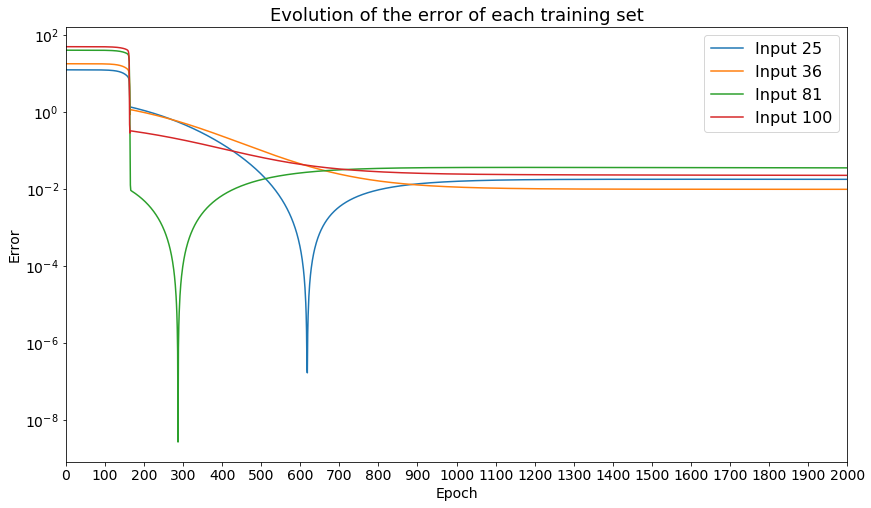

In [19]:
# show the error of each input for each epoch
fig, ax = plt.subplots(1, figsize=(14,8))
[ax.semilogy(errorEpoch[i], label='Input %i' %trainingSet[i]) for i in range(len(errorEpoch))]
ax.legend(fontsize=16)
ax.set_xlim([0,2000])
ax.set_ylabel('Error',fontsize = 14)
ax.set_xlabel('Epoch',fontsize = 14)
ax.set_xticks(np.arange(0,2100,100))
ax.set_title('Evolution of the error of each training set', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

(there are two valleys that may be due to overfeeding the neural network)

In [20]:
#Class to create an HTML table with some data - taken from Yves Dubief
class ListTable(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            for col in row:
                html.append("<td>{0}</td>".format(col))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [21]:
# creation of a table to show up some examples
table = ListTable()
table.append(['<b>Input</b>', '<b>Neural network</b>', r'<b>True value (<tt>sqrt</tt>)</b>', '<b> Aboslute error </b>', '<b> Relative error </b>'])
for i in [9,16,26,37,45,54,63,72,85,99,121,144,169,196,225,256,289]:
    if min(trainingSet) < i < max(trainingSet):
        table.append(['<b>%i</b>' %i, '%.4f' %neuralNetwork(i, weights, bias)[0], '%.4f' %np.sqrt(i), 
                  '%.4f' %(neuralNetwork(i, weights, bias)[0]-np.sqrt(i)),
                  '<b>%.4f</b>' %(100*np.abs(neuralNetwork(i, weights, bias)[0]-np.sqrt(i))/np.sqrt(i))])        
    else:
        table.append(['%i' %i, '%.4f' %neuralNetwork(i, weights, bias)[0], '%.4f' %np.sqrt(i), 
                  '%.4f' %(neuralNetwork(i, weights, bias)[0]-np.sqrt(i)),
                  '%.4f' %(100*np.abs(neuralNetwork(i, weights, bias)[0]-np.sqrt(i))/np.sqrt(i))])
table

Input,Neural network,True value (sqrt),Aboslute error,Relative error
9,4.1756,3.0000,1.1756,39.1877
16,4.6187,4.0000,0.6187,15.4674
26,5.2516,5.0990,0.1526,2.9932
37,5.9479,6.0828,-0.1349,2.2173
45,6.4542,6.7082,-0.2540,3.7857
54,7.0239,7.3485,-0.3246,4.4168
63,7.5936,7.9373,-0.3437,4.3302
72,8.1632,8.4853,-0.3221,3.7956
85,8.9860,9.2195,-0.2335,2.5326
99,9.8722,9.9499,-0.0777,0.7809
